## 2023 La Nina Cruise Mixing Analysis<br>
This notebook details our process for calculating Richardson numbers, Thorpe Scales, and Turbulent Dissipation Rates for the 2023 La Nina Cruise<br>
Note that this notebook utilizes both code from Susan Hautala and code inspired by ChatGPT

In [114]:
# dependencies
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import xarray as xr
import pandas as pd
import math
import gsw

import mixsea as mx

### Let's start by loading our ADCP, then CTD data

# ADCP Data
datadir = 'data/2023/adcp/'
filepathadcp = datadir+'a_tt039.blk'
ADCP = xr.open_dataset(filepathadcp, decode_times=False)

In [386]:
# function for extracting coordinates from CTD files
def get_coords(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Search for lines containing latitude and longitude information
    latitude = None
    longitude = None
    
    for line in lines:
        if line.startswith('* NMEA Latitude'):
            components = line.split('=')
            lat_degrees, lat_minutes, lat_direction = components[1].strip().split()
            latitude = float(lat_degrees) + float(lat_minutes) / 60
            if lat_direction == 'S':
                latitude *= -1  # For southern hemisphere, change latitude to negative
    
        elif line.startswith('* NMEA Longitude'):
            components = line.split('=')
            lon_degrees, lon_minutes, lon_direction = components[1].strip().split()
            longitude = float(lon_degrees) + float(lon_minutes) / 60
            if lon_direction == 'W':
                longitude *= -1  # For western hemisphere, change longitude to negative
    return latitude, longitude

key for CTD data <br>
P = Pressure <br>
T = Temperature <br>
S = Salinity <br>
D = Density

In [339]:
# %matplotlib inline # magic for visualizations

# loading ctd data
datadir = 'data/2023/ctd/'

coords = [] # set up coord list

# waypoint 1
wp1 = datadir+'413S1C1.cnv'
P_1, T_1, S_1, D_1 = np.genfromtxt(fname=wp1,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_1.size,'wp1 size')
wp1_lat, wp1_lon = get_coords(wp1)
coords.append((wp1_lat, wp1_lon))

# waypoint 2
wp2 = datadir+'4130101.cnv'
P_2, T_2, S_2, D_2 = np.genfromtxt(fname=wp2,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_2.size,'wp2 size')
wp2_lat, wp2_lon = get_coords(wp2)
coords.append((wp2_lat, wp2_lon))

# waypoint 3
wp3 = datadir+'4130202.cnv'
P_3, T_3, S_3, D_3 = np.genfromtxt(fname=wp3,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_3.size,'wp3 size')
wp3_lat, wp3_lon = get_coords(wp3)
coords.append((wp3_lat, wp3_lon))

# waypoint 4
wp4 = datadir+'4130301.cnv'
P_4, T_4, S_4, D_4 = np.genfromtxt(fname=wp4,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_1.size,'wp4 size')
wp4_lat, wp4_lon = get_coords(wp4)
coords.append((wp4_lat, wp4_lon))

# waypoint 5
wp5 = datadir+'4130401.cnv'
P_5, T_5, S_5, D_5 = np.genfromtxt(fname=wp5,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_5.size,'wp5 size')
wp5_lat, wp5_lon = get_coords(wp5)
coords.append((wp5_lat, wp5_lon))

# waypoint 6
wp6 = datadir+'4130501.cnv'
P_6, T_6, S_6, D_6 = np.genfromtxt(fname=wp6,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_6.size,'wp6 size')
wp6_lat, wp6_lon = get_coords(wp6)
coords.append((wp6_lat, wp6_lon))

# waypoint 7
wp7 = datadir+'4130601.cnv'
P_7, T_7, S_7, D_7 = np.genfromtxt(fname=wp7,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_7.size,'wp7 size')
wp7_lat, wp7_lon = get_coords(wp7)
coords.append((wp7_lat, wp7_lon))

# waypoint 8
wp8 = datadir+'4130701.cnv'
P_8, T_8, S_8, D_8 = np.genfromtxt(fname=wp8,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_8.size,'wp8 size')
wp8_lat, wp8_lon = get_coords(wp8)
coords.append((wp8_lat, wp8_lon))

# waypoint 9
wp9 = datadir+'4130801.cnv'
P_9, T_9, S_9, D_9 = np.genfromtxt(fname=wp9,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_9.size,'wp9 size')
wp9_lat, wp9_lon = get_coords(wp9)
coords.append((wp9_lat, wp9_lon))

# waypoint 10
wp10 = datadir+'4130901.cnv'
P_10, T_10, S_10, D_10 = np.genfromtxt(fname=wp10,usecols=(2,3,14,16),skip_header=364,unpack=True, encoding='iso-8859-1')
print(P_10.size,'wp10 size')
wp10_lat, wp10_lon = get_coords(wp10)
coords.append((wp10_lat, wp10_lon))

# waypoint 11
wp11 = datadir+'4131001.cnv'
P_11, T_11, S_11, D_11 = np.genfromtxt(fname=wp11,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_11.size,'wp11 size')
wp11_lat, wp11_lon = get_coords(wp11)
coords.append((wp11_lat, wp11_lon))

# waypoint 12
wp12 = datadir+'4131101.cnv'
P_12, T_12, S_12, D_12 = np.genfromtxt(fname=wp12,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_12.size,'wp12 size')
wp12_lat, wp12_lon = get_coords(wp12)
coords.append((wp12_lat, wp12_lon))

# waypoint 13
wp13 = datadir+'4131201.cnv'
P_13, T_13, S_13, D_13 = np.genfromtxt(fname=wp13,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_13.size,'wp13 size')
wp13_lat, wp13_lon = get_coords(wp13)
coords.append((wp13_lat, wp13_lon))

# waypoint 14
wp14 = datadir+'4131301.cnv'
P_14, T_14, S_14, D_14 = np.genfromtxt(fname=wp14,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_14.size,'wp14 size')
wp14_lat, wp14_lon = get_coords(wp14)
coords.append((wp4_lat, wp4_lon))

# waypoint 15
wp15 = datadir+'4131401.cnv'
P_15, T_15, S_15, D_15 = np.genfromtxt(fname=wp15,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_15.size,'wp15 size')
wp15_lat, wp15_lon = get_coords(wp15)
coords.append((wp15_lat, wp15_lon))

# waypoint 16
wp16 = datadir+'4131501.cnv'
P_16, T_16, S_16, D_16 = np.genfromtxt(fname=wp16,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_16.size,'wp16 size')
wp16_lat, wp16_lon = get_coords(wp16)
coords.append((wp16_lat, wp16_lon))

# waypoint 17
wp17 = datadir+'4131601.cnv'
P_17, T_17, S_17, D_17 = np.genfromtxt(fname=wp17,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_17.size,'wp17 size')
wp17_lat, wp17_lon = get_coords(wp17)
coords.append((wp17_lat, wp17_lon))

# waypoint 18
wp18 = datadir+'4131602.cnv'
P_18, T_18, S_18, D_18 = np.genfromtxt(fname=wp18,usecols=(2,3,14,16),skip_header=363,unpack=True, encoding='iso-8859-1')
print(P_18.size,'wp18 size')
wp18_lat, wp18_lon = get_coords(wp18)
coords.append((wp18_lat, wp18_lon))

24790 wp1 size
35148 wp2 size
99560 wp3 size
24790 wp4 size
101250 wp5 size
94529 wp6 size
106219 wp7 size
91939 wp8 size
92496 wp9 size
318928 wp10 size
104612 wp11 size
91028 wp12 size
84543 wp13 size
99837 wp14 size
86641 wp15 size
91193 wp16 size
116274 wp17 size
213664 wp18 size


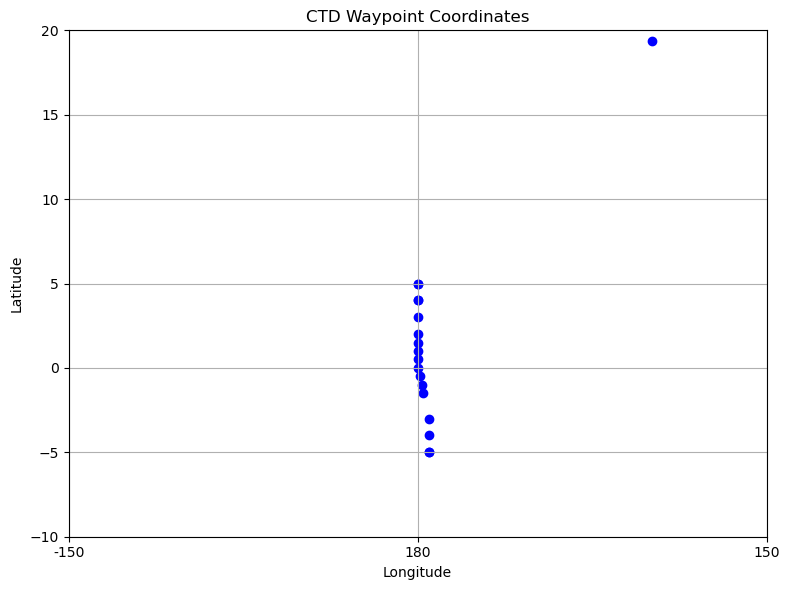

In [117]:
# Extract latitudes and longitudes
latitudes = [coord[0] for coord in coords]
converted_longitudes = [lon if lon >= 0 else lon + 360 for lat, lon in coords]

plt.figure(figsize=(8, 6))
plt.scatter(converted_longitudes, latitudes, color='blue', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('CTD Waypoint Coordinates')

plt.xticks(
    np.linspace(0, 360, 13),  # Locations of the ticks
    ['0', '-30', '-60', '-90', '-120', '-150', '180','150', '120', '90', '60', '30', '0']  # Labels
)

# Zoom in by setting limits for better visualization
plt.xlim(150, 210)
plt.ylim(-10, 20)

plt.grid(True)
plt.tight_layout()
plt.show()

This tells us for our transect across the equator, we will need to only use the Waypoints between 5 and -5, not the Waypoint near 20 (this is Waypoint 2)

Let's isolate the down cast and take an initial look at our data

In [384]:
# Isolate the down cast and get rid of any "bounces" to lower pressure 
# because the mixing package needs a monotonic "depth" coordinate
def down_clean(P, T, S, D):
    pmax = np.max(P)
    ipmax = np.where(P==pmax)[0][0]
    #print('Bottom of the cast at index',ipmax,'with', pmax,'dbar')
    ipmin=0
    pmin = P[0]
    for i in range(1,ipmax):
        if P[i]<pmin:
            ipmin=i
            pmin = P[i]
    #print('Top of the cast at index',ipmin,'with',pmin,'dbar')
    
    P_down=[]
    T_down=[]
    S_down=[]
    D_down=[]
    
    P_bounce=0.0
    bounceCount = 0
    for i in range(ipmin,ipmax):
        if P[i]>P_bounce:
            P_down.append(P[i])
            P_bounce=P[i]
            S_down.append(S[i])
            T_down.append(T[i])
            D_down.append(D[i])
        else:
            bounceCount = bounceCount+1
    return P_down, S_down, T_down, D_down

In [126]:
P_1, S_1, T_1, D_1 = down_clean(P_1, S_1, T_1, D_1)
P_2, S_2, T_2, D_2 = down_clean(P_2, S_2, T_2, D_2)
P_3, S_3, T_3, D_3 = down_clean(P_3, S_3, T_3, D_3)
P_4, S_4, T_4, D_4 = down_clean(P_4, S_4, T_4, D_4)
P_5, S_5, T_5, D_5 = down_clean(P_5, S_5, T_5, D_5)
P_6, S_6, T_6, D_6 = down_clean(P_6, S_6, T_6, D_6)
P_7, S_7, T_7, D_7 = down_clean(P_7, S_7, T_7, D_7)
P_8, S_8, T_8, D_8 = down_clean(P_8, S_8, T_8, D_8)
P_9, S_9, T_9, D_9 = down_clean(P_9, S_9, T_9, D_9)
P_10, S_10, T_10, D_10 = down_clean(P_10, S_10, T_10, D_10)
P_11, S_11, T_11, D_11 = down_clean(P_11, S_11, T_11, D_11)
P_12, S_12, T_12, D_12 = down_clean(P_12, S_12, T_12, D_12)
P_13, S_13, T_13, D_13 = down_clean(P_13, S_13, T_13, D_13)
P_14, S_14, T_14, D_14 = down_clean(P_14, S_14, T_14, D_14)
P_15, S_15, T_15, D_15 = down_clean(P_15, S_15, T_15, D_15)
P_16, S_16, T_16, D_16 = down_clean(P_16, S_16, T_16, D_16)
P_17, S_17, T_17, D_17 = down_clean(P_17, S_17, T_17, D_17)
P_18, S_18, T_18, D_18 = down_clean(P_18, S_18, T_18, D_18)


In [127]:
# concatenate all data into arrays by datatype
pressures = np.concatenate((P_1, P_3, P_4, P_5, P_6, P_7, P_8, P_9, P_10, P_11, P_12, P_13, P_14, P_15, P_16, P_17, P_18))
salts = np.concatenate((S_1, S_3, S_4, S_5, S_6, S_7, S_8, S_9, S_10, S_11, S_12, S_13, S_14, S_15, S_16, S_17, S_18))
temps = np.concatenate((T_1, T_3, T_4, T_5, T_6, T_7, T_8, T_9, T_10, T_11, T_12, T_13, T_14, T_15, T_16, T_17, T_18))
densities = np.concatenate((D_1, D_3, D_4, D_5, D_6, D_7, D_8, D_9, D_10, D_11, D_12, D_13, D_14, D_15, D_16, D_17, D_18))

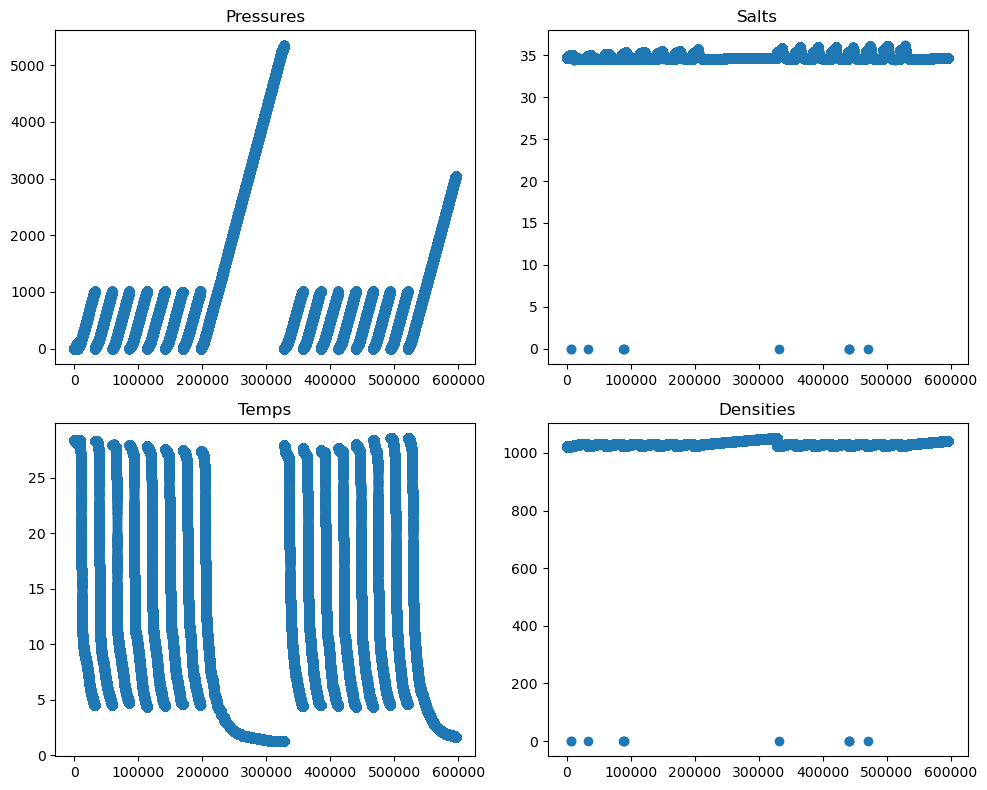

In [128]:
# visualize
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(np.linspace(0, len(pressures), len(pressures)), pressures)
axs[0, 0].set_title('Pressures')

axs[0, 1].scatter(np.linspace(0, len(salts), len(salts)), salts)
axs[0, 1].set_title('Salts')

axs[1, 0].scatter(np.linspace(0, len(temps), len(temps)), temps)
axs[1, 0].set_title('Temps')

axs[1, 1].scatter(np.linspace(0, len(densities), len(densities)), densities)
axs[1, 1].set_title('Densities')

plt.tight_layout()
plt.show()

The data has some outliers, so let's clean it up. <br>
For now, let's exclude WP 8 and WP 18 as both exhibit irregular behavior. Let's also exclude WP 1 as it only measures to 1/10 the depth of the other casts

In [192]:
# concatenate all data into arrays by datatype
pressures = np.concatenate((P_3, P_4, P_5, P_6, P_7, P_8, P_9, P_11, P_12, P_13, P_14, P_15, P_16, P_17))
salts = np.concatenate((S_3, S_4, S_5, S_6, S_7, S_8, S_9, S_11, S_12, S_13, S_14, S_15, S_16, S_17))
temps = np.concatenate((T_3, T_4, T_5, T_6, T_7, T_8, T_9, T_11, T_12, T_13, T_14, T_15, T_16, T_17))
densities = np.concatenate((D_3, D_4, D_5, D_6, D_7, D_8, D_9, D_11, D_12, D_13, D_14, D_15, D_16, D_17))

In [193]:
# let's clean the outliers now
# temps:
for i in range(0,len(temps)):
    if temps[i] <= 3:
        temps[i] = np.nan

# salts:
for i in range(0,len(salts)):
    if salts[i] <= 1:
        salts[i] = np.nan

# densities:
for i in range(0,len(densities)):
    if densities[i] <= 30:
        densities[i] = np.nan

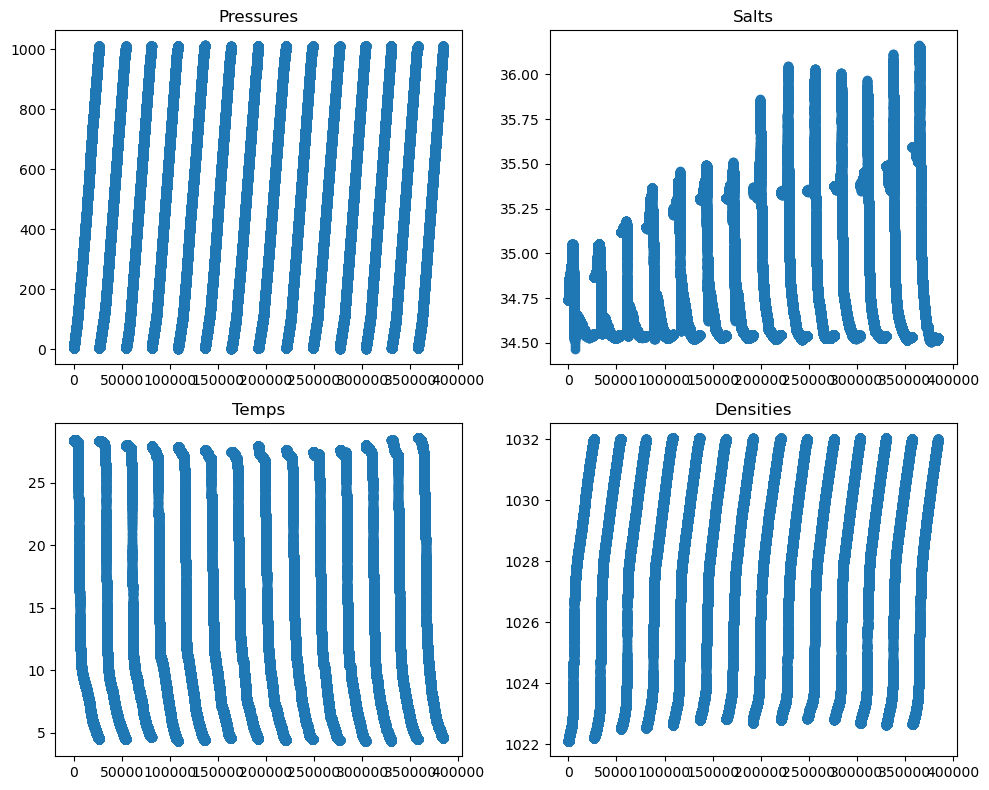

In [194]:
# visualize
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(np.linspace(0, len(pressures), len(pressures)), pressures)
axs[0, 0].set_title('Pressures')

axs[0, 1].scatter(np.linspace(0, len(salts), len(salts)), salts,)
axs[0, 1].set_title('Salts')

axs[1, 0].scatter(np.linspace(0, len(temps), len(temps)), temps)
axs[1, 0].set_title('Temps')

axs[1, 1].scatter(np.linspace(0, len(densities), len(densities)), densities)
axs[1, 1].set_title('Densities')

plt.tight_layout()
plt.show()

### These look better. Let's bin average and organize everything into a dataframe

In [195]:
# organize into df inputs
pressures = [P_3, P_4, P_5, P_6, P_7, P_8, P_9, P_11, P_12, P_13, P_14, P_15, P_16, P_17]
salts = [S_3, S_4, S_5, S_6, S_7, S_8, S_9, S_11, S_12, S_13, S_14, S_15, S_16, S_17]
temps = [T_3, T_4, T_5, T_6, T_7, T_8, T_9, T_11, T_12, T_13, T_14, T_15, T_16, T_17]
densities = [D_3, D_4, D_5, D_6, D_7, D_8, D_9, D_11, D_12, D_13, D_14, D_15, D_16, D_17]

# clean df inputs
# temps:
for i in temps:
    for j in range(0,len(i)):
        if i[j] <= 3:
            i[j] = np.nan

# salts:
for i in salts:
    for j in range(0,len(i)):
        if i[j] <= 1:
            i[j] = np.nan

# densities:
for i in densities:
    for j in range(0,len(i)):
        if i[j] <= 30:
            i[j] = np.nan

In [341]:
# bin average df inputs
num_bins = 1000

# pressures:
wpcount = 0
for wp in pressures:
    _, bin_edges = np.histogram(np.arange(len(wp)), bins=num_bins) # bin data
    b_avg = [np.mean(wp[int(start):int(end)]) for start, end in zip(bin_edges[:-1], bin_edges[1:])] # avg data by bin
    if wpcount == 0:
        P_df = pd.DataFrame(b_avg) # create dataframe
    if wpcount > 0:
        P_df[wpcount] = (b_avg) # update dataframe iteratively
    wpcount = wpcount + 1 # update wpcount

# temps:
wpcount = 0
for wp in temps:
    _, bin_edges = np.histogram(np.arange(len(wp)), bins=num_bins) # bin data
    b_avg = [np.mean(wp[int(start):int(end)]) for start, end in zip(bin_edges[:-1], bin_edges[1:])] # avg data by bin
    if wpcount == 0:
        T_df = pd.DataFrame(b_avg) # create dataframe
    if wpcount > 0:
        T_df[wpcount] = (b_avg) # update dataframe iteratively
    wpcount = wpcount + 1 # update wpcount

# salts:
wpcount = 0
for wp in salts:
    _, bin_edges = np.histogram(np.arange(len(wp)), bins=num_bins) # bin data
    b_avg = [np.mean(wp[int(start):int(end)]) for start, end in zip(bin_edges[:-1], bin_edges[1:])] # avg data by bin
    if wpcount == 0:
        S_df = pd.DataFrame(b_avg) # create dataframe
    if wpcount > 0:
        S_df[wpcount] = (b_avg) # update dataframe iteratively
    wpcount = wpcount + 1 # update wpcount

# densities:
wpcount = 0
for wp in densities:
    _, bin_edges = np.histogram(np.arange(len(wp)), bins=num_bins) # bin data
    b_avg = [np.mean(wp[int(start):int(end)]) for start, end in zip(bin_edges[:-1], bin_edges[1:])] # avg data by bin
    if wpcount == 0:
        D_df = pd.DataFrame(b_avg) # create dataframe
    if wpcount > 0:
        D_df[wpcount] = (b_avg) # update dataframe iteratively
    wpcount = wpcount + 1 # update wpcount

### Now, let's get the coords of the selected CTD waypoints and plot four transects with linear interpolation

In [342]:
# get lats
selected_coords = []
selected_coords.append(wp3_lat)
selected_coords.append(wp4_lat)
selected_coords.append(wp5_lat)
selected_coords.append(wp6_lat)
selected_coords.append(wp7_lat)
selected_coords.append(wp8_lat)
selected_coords.append(wp9_lat) 
selected_coords.append(wp11_lat)
selected_coords.append(wp12_lat) 
selected_coords.append(wp13_lat)
selected_coords.append(wp14_lat) 
selected_coords.append(wp15_lat)
selected_coords.append(wp16_lat)
selected_coords.append(wp17_lat)

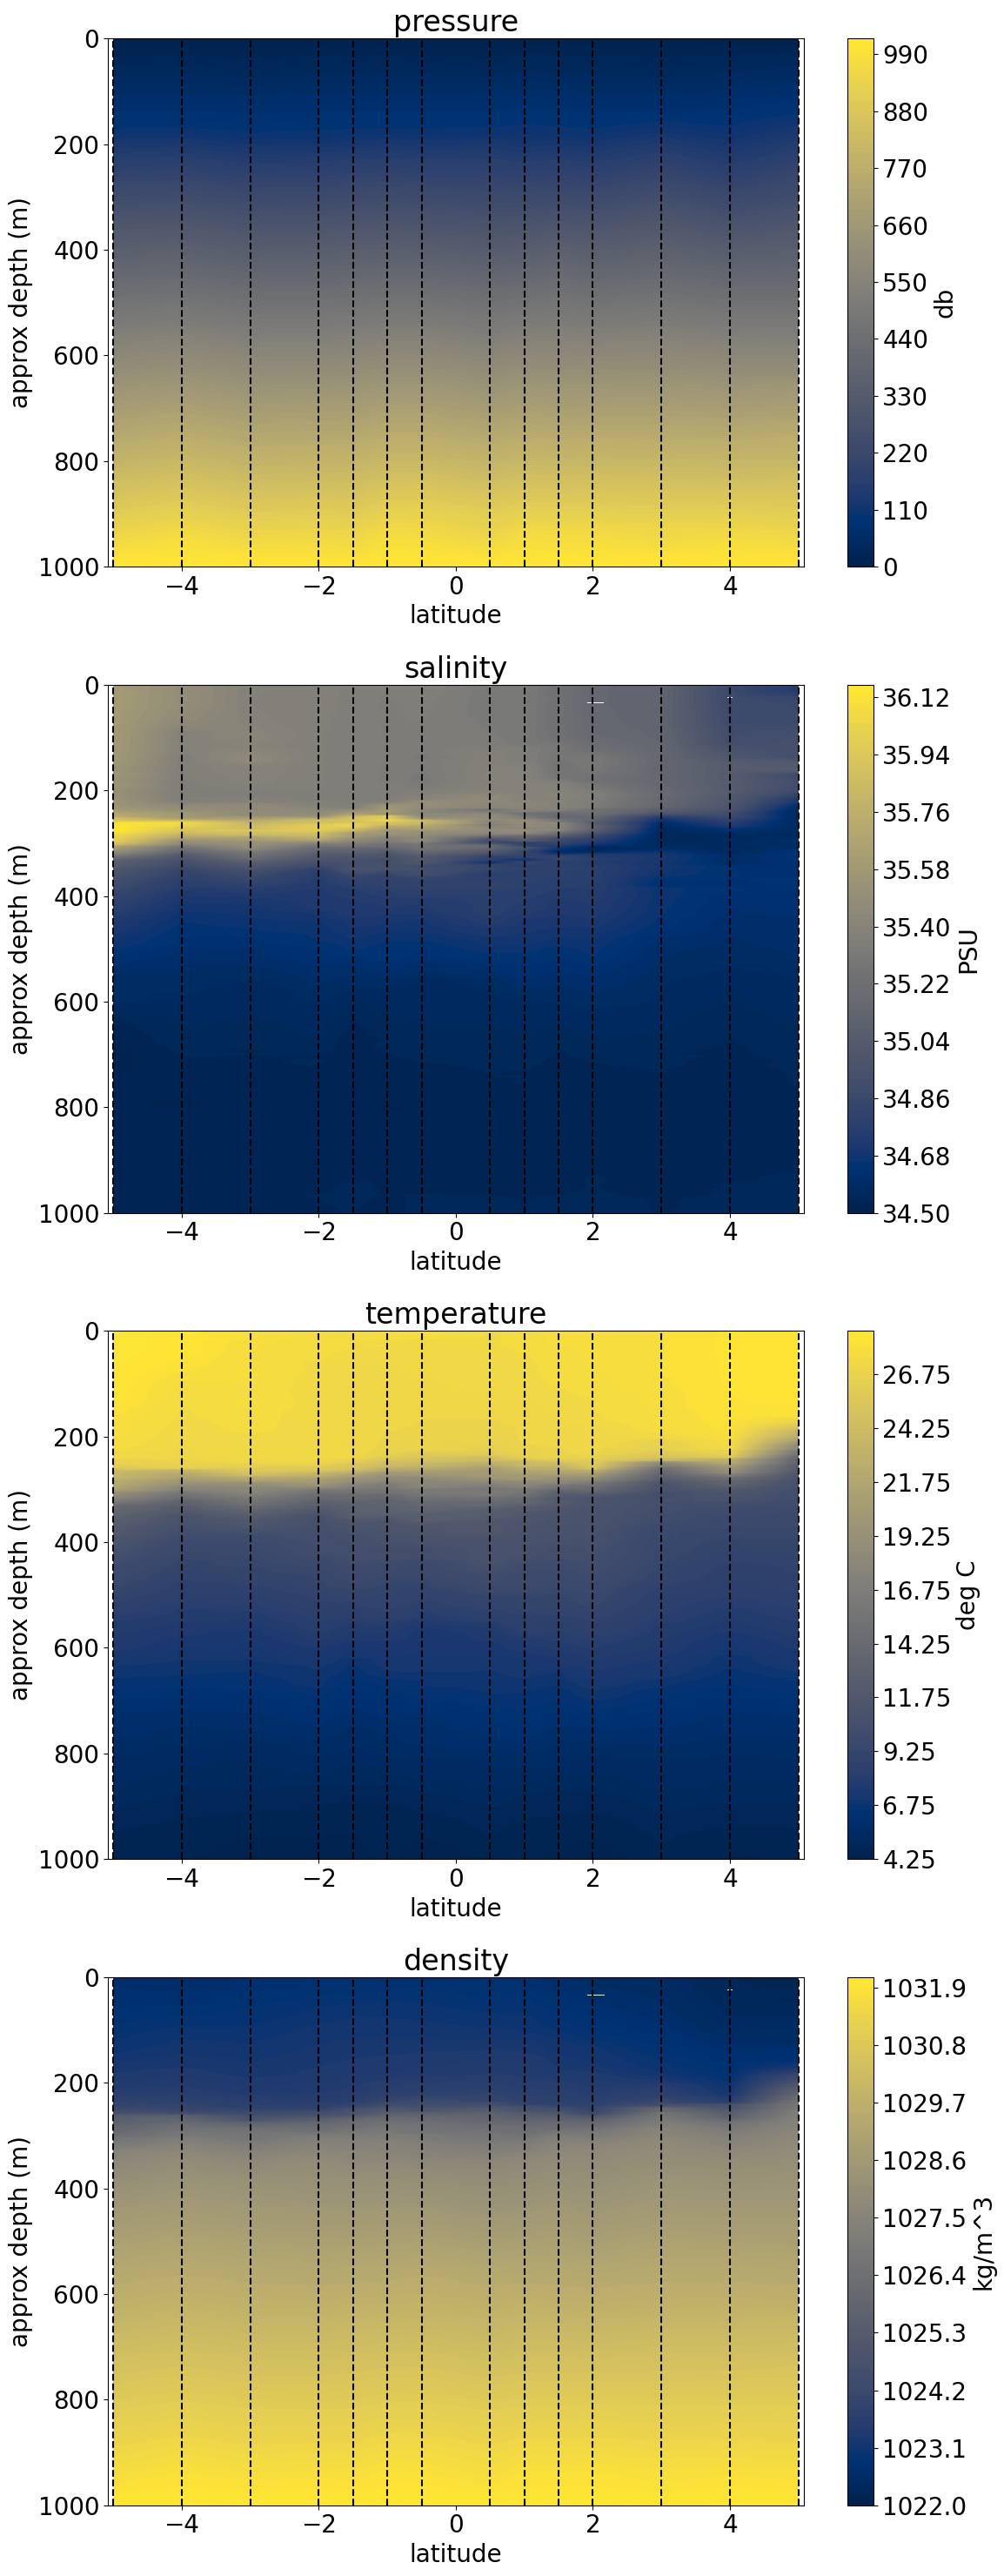

In [383]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(4, 1, figsize=(12, 30))

# Plot P_df
contour_P = axs[0].contourf(selected_coords, np.linspace(0, num_bins, num_bins), P_df, levels=100, cmap='cividis')
for wp in P_df:
    axs[0].axvline(x=selected_coords[wp], color='k', linestyle='--', label='CTD Cast')
axs[0].set_xlim(-5.08, 5.08)
axs[0].invert_yaxis()
axs[0].set_ylabel('approx depth (m)')
axs[0].set_xlabel('latitude')
axs[0].set_title('pressure')
cbar_P = plt.colorbar(contour_P, ax=axs[0])
cbar_P.set_label('db')

# Plot S_df
contour_S = axs[1].contourf(selected_coords, np.linspace(0, num_bins, num_bins), S_df, levels=100, cmap='cividis')
for wp in S_df:
    axs[1].axvline(x=selected_coords[wp], color='k', linestyle='--', label='CTD Cast')
axs[1].set_xlim(-5.08, 5.08)
axs[1].invert_yaxis()
axs[1].set_ylabel('approx depth (m)')
axs[1].set_xlabel('latitude')
axs[1].set_title('salinity')
cbar_S = plt.colorbar(contour_S, ax=axs[1])
cbar_S.set_label('PSU')

# Plot T_df
contour_T = axs[2].contourf(selected_coords, np.linspace(0, num_bins, num_bins), T_df, levels=100, cmap='cividis')
for wp in T_df:
    axs[2].axvline(x=selected_coords[wp], color='k', linestyle='--', label='CTD Cast')
axs[2].set_xlim(-5.08, 5.08)
axs[2].invert_yaxis()
axs[2].set_ylabel('approx depth (m)')
axs[2].set_xlabel('latitude')
axs[2].set_title('temperature')
cbar_T = plt.colorbar(contour_T, ax=axs[2])
cbar_T.set_label('deg C')

# Plot D_df
contour_D = axs[3].contourf(selected_coords, np.linspace(0, num_bins, num_bins), D_df, levels=100, cmap='cividis')
for wp in D_df:
    axs[3].axvline(x=selected_coords[wp], color='k', linestyle='--', label='CTD Cast')
axs[3].set_xlim(-5.08, 5.08)
axs[3].invert_yaxis()
axs[3].set_ylabel('approx depth (m)')
axs[3].set_xlabel('latitude')
axs[3].set_title('density')
cbar_D = plt.colorbar(contour_D, ax=axs[3])
cbar_D.set_label('kg/m^3')

plt.tight_layout()
plt.show()